In [2]:
import numpy as np
import math
from __future__ import division
import pandas as pd
import scipy.stats as stats
%matplotlib inline

In [3]:
# Calculate mean
data = [33219, 36254, 38801, 46335, 46840, 47596, \
        55130, 56863, 78070, 88830]
mean = np.mean(data)

all_dev = []
for d in data:
    all_dev.append(math.fabs(d - mean)**2)

print math.sqrt(np.mean(all_dev))
    

17076.9651976


In [4]:
# Testing the map function
data = [-6458.8, -5197.8, 4069.2]
sq_data = map(lambda x: round(x**2,1), data)
print sq_data

[41716097.4, 27017124.8, 16558388.6]


   0
a  3
c  1
b  4
d  1
h  1
s  1


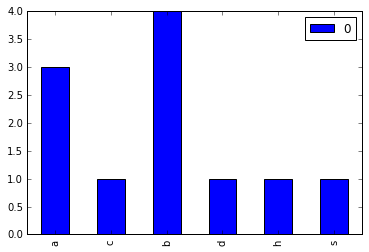

In [5]:
# Testing pandas frequency plot
from collections import Counter
some_str = "absdhbaacbb"
letter_count = Counter(some_str)

df = pd.DataFrame.from_dict(letter_count, orient="index")
print df
df.plot(kind="bar")

In [6]:
import random
population = [1, 2, 3, 4, 5, 6]

sample = 20
rounds = 10000
for i in range(rounds):
    means = []
    for j in range(sample):
        sample_mean = np.mean([random.choice(population), random.choice(population)])
        means.append(sample_mean)
    
print np.mean(means)  


3.625


In [7]:
"""
Calculating confidence intervals.

95% --> z-score: 1.96
98% --> z-score: 
99% --> z-score:  
"""

def confInterval(mu, sd, z):
    cint = [round(i*(sd*z)+mu, 3) for i in [-1, 1]]
    print "Confidence interval"
    print cint

# Calutate Z-score
def calc_Zscore(mu, se, x):
    z = (x - mu) / se
    return round(z, 3)

In [8]:
sigma = 2.8
sample = [8, 9, 12, 13, 14, 16]
n = np.size(sample)
sx = sigma / math.sqrt(n)

confInterval(mu=np.mean(sample), sd=sx, z=1.96)

Confidence interval
[9.76, 14.24]


In [9]:
calc_Zscore(180, 18/math.sqrt(9), 175)
print 2.575*(18./math.sqrt(9))

confInterval(mu=175, sd=18/math.sqrt(9), z=2.575)

15.45
Confidence interval
[159.55, 190.45]


In [10]:
# Population
mu = 7.47
s = 2.41
# Sample
n = 50
s_mu = mu
s_s = s / math.sqrt(n)

z_score = calc_Zscore(s_mu, s_s, x=8.3)
print z_score

2.435


In [11]:
mu = 7.47
s = 2.41

n = 50
x_bar = 8.3
s_x = s / math.sqrt(n)
print s_x

print (x_bar - mu) / s_x

0.340825468532
2.43526401819


In [12]:
sample = [5, 19, 11, 23, 12, 7, 3, 21]
mu = np.mean(sample)
n = np.size(sample)
print n

def calc_std(sample):
    # Calc some important parameters.
    mu = np.mean(sample)
    n = np.size(sample)
    # Calc. the squarred error
    sqerr = [(x-mu)**2 for x in sample]
    
    return math.sqrt(sum(sqerr) / (n-1))
    
std = calc_std(sample)
print std

t = (mu - 10.) / (std / math.sqrt(n))
print t


8
7.59581651776
0.977461894334


In [13]:
x1 = 9
x2 = 12
s1 = 1.2
s2 = 2.7

x = x2 - x1
s = math.sqrt(s1**2 + s2**2)

print s

print 9 /(s/math.sqrt(1000))

2.95465734054
96.3241948602


In [14]:
# 
qwerty = [6, 6, 2, 7]
alpha = [6, 11, 8, 5]
diff = [x-y for x, y in zip(qwerty, alpha)]

mu_diff = np.mean(diff)

sq = calc_std(qwerty)
sa = calc_std(alpha)
sd = calc_std(diff)

print sd
print math.sqrt(sa**2 + sq**2)
print math.sqrt( (3*sa**2 + 3*sq**2) / 6)



3.86221007542
3.45205252953
2.44096975265


In [15]:
# Computing r^2 - coefficient of determination
# t-test: t**2 / (t**2 + df)

def rsq_ttest(t, df):
    return t**2 / (t**2 + df)

print rsq_ttest(t=2, df=20)


0.166666666667


In [26]:
# Def calculate the t-statistic
def calc_t_statistic(alpha, dof, two_tailed=True):
    t_crit = None
    if not two_tailed:
        t_crit = stats.t.ppf(1 - alpha, dof)
    else:
        # Two tailed
        t_crit = stats.t.ppf(1 - alpha/2, dof)
    return round(t_crit, 3)

print calc_t_statistic(alpha=0.01, dof=7, two_tailed=True)

3.499
